
# 2 Exploratory Data Analysis
---

## 2.1 Contents <a id='2.1_Contents'></a>
- [2.1 Contents](#2.1_Contents)
- [2.2 Introduction](#2.2_Introduction)
- [2.3 Imports](#2.3_Imports)
- [2.4 Load The Data](#2.4_Load_The_Data)
    - [2.4.1 Donation Data](#2.4.1_Donation_Data)
    - [2.4.2 Categorical Features](#2.4.2_Categorical_Features)
        - [2.4.2.1. Brief Review: 'Date Reported' & 'Date Occurred'](#2.4.2.1_Exploring:_Date_Reported_&_Date_Occurred)
        - [2.4.2.2. Brief Review Non-Date Categorical Features](#2.4.2.1.2_Exploring:_Non-Date_Categorical_Features)
    - [2.4.3 Numerical Features](#2.4.3_Numerical_Features) 
- [2.5 Data Exploration](#2.5_Data_Exploration)
    - [2.5.1 Develop and explore hypotheses and investigation themes](#2.5.1_hypotheses_and_investigation)
        - [2.5.1.1 Impact of Contact Type on Donation Amount](#2.5.1.1_Impact_of_Contact_Type_on_Donation_Amount)
        - [2.5.1.2 Relationship Between Contact Social Score and Donor Tenure](#2.5.1.2_Relationship_Between_Contact_Social_Score_and_Donor_Tenure)
        - [2.5.1.3 Effect of Churned Status on Lifetime Value (LTV)](#2.5.1.3_Effect_of_Churned_Status_on_Lifetime_Value_(LTV))
        - [2.5.1.4 Temporal Trends in Donations](#2.5.1.4_Temporal_Trends_in_Donations)
        - [2.5.1.5 Geographic Patterns in Donation Amounts](#2.5.1.5_Geographic_Patterns_in_Donation_Amounts)
- [2.6 Feature Importance](#2.6_Feature_Importance)
- [2.7 Summary](#2.7_Summary)


## 2.2 Introduction

#### Purpose:
This is a continuation of [1.0-faa-data-wrangling-initial-exploration-cleaning-cap3.ipynb](http://localhost:8888/notebooks/notebooks/1.0-faa-data-wrangling-initial-exploration-cleaning-cap3.ipynb) focusing on understanding the relationship between data and features before moving onto modeling. 

Goal: Explore the data relationships of features and understand how the features impact the response variable.

### **Problem Statement:**
Enhance the effectiveness of donor engagement and support for a nonprofit organization by analyzing donor lifetime value, predicting churn, and implementing personalized retention strategies.

## 2.3 Imports <a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from math import trunc
import os

## 2.4 Load The Data <a id='2.4_Load_The_Data'></a>

In [2]:
# Storing file path in variable and then using pd.read_csv() to load the data as a dataframe into crimeData
'''
Download project data from 
https://drive.google.com/drive/folders/1SxuAcdfTXrJvqZeEqaSv7fbJaHqBAufT?usp=sharing
'''

dataFilePath = "/Users/frankyaraujo/Development/springboard_main/Capstone Three/Springboard-Capstone-Three/src/data/Donations _ Jan 2015 to Mar 2024_R1 .csv"
DonationData = pd.read_csv(dataFilePath, low_memory = False)

# Download the data files and then load from where those files are stored
# See instructions in data folder of GitHub Repo : Springboard-Capstone-Two

### 2.4.1 Donation Data <a id='2.4.1_Crime_Data'></a>

In [3]:
DonationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17244 entries, 0 to 17243
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     17244 non-null  int64  
 1   Contact Id                     17244 non-null  int64  
 2   Contact Type                   17244 non-null  object 
 3   Contact Tags                   16809 non-null  object 
 4   Gift Date                      17244 non-null  object 
 5   Amount                         17244 non-null  float64
 6   Gift Type                      17244 non-null  object 
 7   Notes                          5915 non-null   object 
 8   Contact Primary Full Address   17244 non-null  object 
 9   First Gift Date                17244 non-null  object 
 10  Segment Name                   17244 non-null  object 
 11  Campaign Name                  17244 non-null  object 
 12  Contact Primary Address City   17244 non-null 

In [4]:
DonationData.head()

,Unnamed: 0,Contact Id,Contact Type,Contact Tags,Gift Date,Amount,Gift Type,Notes,Contact Primary Full Address,First Gift Date,Segment Name,Campaign Name,Contact Primary Address City,Contact Primary Address State,Contact Social Score,Churned,LTV
0,0,1,Household,Do not call;Website Email Submit,2015-01-01,390.0,Other,Ticket: 2015 Gala - oid=3111666: Source WePay,Unknown,2015-01-01,General Segment,General Giving,Unknown,Unknown,73.0,1,390.000000
1,1,2,Household,Do not call;Website Email Submit,2015-01-01,50.0,Other,Ticket: 4th Annual Saving Innocence Gala VIP ...,Unknown,2015-01-01,General Segment,General Giving,Unknown,Unknown,30.0,1,50.000000
2,2,3,Household,Do not call;Website Email Submit;Sustaining Do...,2015-01-01,120.0,Other,emailed re: stoppage - it's fixed: WePay: Last...,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233
3,3,4,Household,Do not call;Website Email Submit,2015-01-01,40.0,Other,Shopping Cart Payment Received,Unknown,2015-01-01,General Segment,General Giving,Unknown,Unknown,30.0,1,40.000000
4,4,5,Household,NaN,2015-01-01,1500.0,Other,Source Check: Last Donation 12/20/2015,"""Long Beach, CA 90803""",2015-01-01,General Segment,General Giving,Long Beach,CA,30.0,1,1500.000000


### 2.4.2 Categorical Features <a id='2.4.2_Categorical_Features'></a>

In [5]:
DonationData_categorical = DonationData.select_dtypes('object')
DonationData_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17244 entries, 0 to 17243
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Contact Type                   17244 non-null  object
 1   Contact Tags                   16809 non-null  object
 2   Gift Date                      17244 non-null  object
 3   Gift Type                      17244 non-null  object
 4   Notes                          5915 non-null   object
 5   Contact Primary Full Address   17244 non-null  object
 6   First Gift Date                17244 non-null  object
 7   Segment Name                   17244 non-null  object
 8   Campaign Name                  17244 non-null  object
 9   Contact Primary Address City   17244 non-null  object
 10  Contact Primary Address State  17244 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [6]:
DonationData_categorical.describe()

,Contact Type,Contact Tags,Gift Date,Gift Type,Notes,Contact Primary Full Address,First Gift Date,Segment Name,Campaign Name,Contact Primary Address City,Contact Primary Address State
count,17244,16809,17244,17244,5915,17244,17244,17244,17244,17244,17244
unique,3,422,2375,7,3516,2009,1114,46,5,833,76
top,Household,Lapsed Donor;Website Email Submit,2016-01-01,Credit,Check,Unknown,2016-01-01,General Segment,General Giving,Unknown,CA
freq,15839,1919,586,12319,370,3444,4029,10603,16680,3445,9701


The dataset comprises various contact types, among which "Household" predominates. Contact tags exhibit a wide range, with combinations like "Lapsed Donor;Website Email Submit" being particularly common. Donations are spread across numerous dates, with "2016-01-01" emerging as the most frequent. The types of gifts vary, with credit-based donations prevailing. Notably, there are numerous unique notes attached to the entries, with "Unknown" being the most frequent. Regarding addresses, there are various, yet "Unknown" entries are notable. Initial gift dates span a range, with "2016-01-01" recurring frequently. The segments within the dataset are diverse, with "General Segment" appearing prominently. Similarly, campaigns contain "General Giving" being a prevalent theme. Address cities are varied, with "Unknown" entries notable, while California (CA) is the most frequent state listed among the addresses.

#### 2.4.2.1. Brief Review of 'Gift Date' & 'First Gift Date' <a id='2.4.2.1_Exploring:_Date_Reported_&_Date_Occurred'></a>

'Gift Date' is the date of the donation where as 'First Date' represents the first date that the donor donated to the organization. 

In [7]:
DonationData[DonationData['Contact Id']==3].head(4)

,Unnamed: 0,Contact Id,Contact Type,Contact Tags,Gift Date,Amount,Gift Type,Notes,Contact Primary Full Address,First Gift Date,Segment Name,Campaign Name,Contact Primary Address City,Contact Primary Address State,Contact Social Score,Churned,LTV
2,2,3,Household,Do not call;Website Email Submit;Sustaining Do...,2015-01-01,120.0,Other,emailed re: stoppage - it's fixed: WePay: Last...,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233
497,497,3,Household,Do not call;Website Email Submit;Sustaining Do...,2015-01-01,12.0,Other,Recurring Donation: Saving Innocence - Become ...,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233
770,770,3,Household,Do not call;Website Email Submit;Sustaining Do...,2016-01-01,144.0,Other,NaN,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233
1364,1364,3,Household,Do not call;Website Email Submit;Sustaining Do...,2017-01-01,12.0,Other,NaN,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233


The example above illustrates how the 'First Gift Date' is equivalent to the 'Gift Date' of the first donation made by donor 3. However, the 'First Gift Date' remains unchanged for subsequent donations from the same donor.

In [8]:
# subset the dataframe to explore only the date columns 
DonationDates = DonationData.loc[:,["Contact Id","Gift Date","First Gift Date"]]           

In [9]:
DonationDates.head()

,Contact Id,Gift Date,First Gift Date
0,1,2015-01-01,2015-01-01
1,2,2015-01-01,2015-01-01
2,3,2015-01-01,2015-01-01
3,4,2015-01-01,2015-01-01
4,5,2015-01-01,2015-01-01


To effectively handle and manipulate the dates within the dataset, these variables will be converted to the datetime format. This transformation is essential for performing any time series analysis or date-specific aggregations in our analysis.

In [10]:
# convert to datetime to analyze 
DonationDates_converted = DonationDates.copy()

# Apply datetime conversion only to specific columns
DonationDates_converted['Gift Date'] = DonationDates_converted['Gift Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
DonationDates_converted['First Gift Date'] = DonationDates_converted['First Gift Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [11]:
DonationDates_converted.describe(datetime_is_numeric=True)

,Contact Id,Gift Date,First Gift Date
count,17244.000000,17244,17244
mean,4867.408200,2020-07-24 21:25:10.647181824,2018-02-17 22:42:20.292275712
min,1.000000,2014-01-01 00:00:00,2014-01-01 00:00:00
25%,1192.000000,2018-12-29 00:00:00,2016-01-01 00:00:00
50%,3666.000000,2020-11-17 00:00:00,2017-12-15 00:00:00
75%,9399.000000,2022-06-17 00:00:00,2020-04-24 00:00:00
max,12724.000000,2024-03-25 00:00:00,2024-03-23 00:00:00
std,4093.166233,NaN,NaN


The data we have shows information about two types of donation dates across 17,244 records: the date each donation was made and the date each donor first gave. On average, donations tend to cluster around mid-2020, with the earliest recorded in January 2014 and the most recent expected in March 2024. This shows that donations have been made consistently over a long period.

The date of a donor's first donation averages to early 2018, which is quite a bit earlier than the average for all donations. Like the overall donation dates, these first donations also start in January 2014 and continue until March 2024. It's interesting to note that about half of all first-time donations were made by the end of 2017, indicating that many donors started their contributions quite a few years ago.

This data not only shows us how long and steadily people have been donating but also suggests an increase in either the number of donors or donations in recent years. Understanding these patterns helps appreciate how loyal and generous donors have been over time and highlights the ongoing support for the cause.

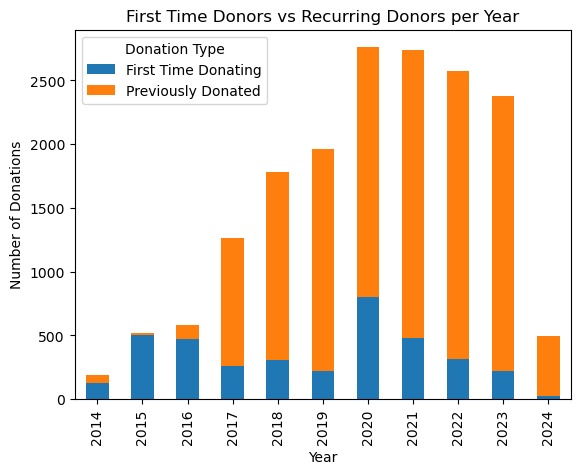

In [12]:
# Assuming DonationDates_converted is your original DataFrame
# Extract year from datetime values
DonationDates_converted['Gift Year'] = DonationDates_converted['Gift Date'].dt.year
DonationDates_converted['First Gift Year'] = DonationDates_converted['First Gift Date'].dt.year

# Identify first donations
first_donations = DonationDates_converted.drop_duplicates(subset=['Contact Id','First Gift Year'])

# Label each donation as 'first' or 'subsequent'
DonationDates_converted['Donation Type'] = 'Previously Donated'
DonationDates_converted.loc[first_donations.index, 'Donation Type'] = 'First Time Donating'

# Group by year and donation type to count each category
donations_per_year_type = DonationDates_converted.groupby(['Gift Year', 'Donation Type']).size().unstack(fill_value=0)

# Create a stacked bar graph
donations_per_year_type.plot(kind='bar', stacked=True)

# Labeling the axes and title
plt.xlabel("Year")
plt.ylabel("Number of Donations")
plt.title("First Time Donors vs Recurring Donors per Year")

# Show plot
plt.show()



The data spans 11 years, from 2014 to 2024, and categorizes donation occurrences into "First Time Donating" and "Previously Donated" instances for each year. Notably, the frequency of first-time donations varies annually, ranging from a minimum of 27 occurrences in 2024 to a peak of 798 occurrences in 2020. In contrast, the instances of donations from individuals with a history of contribution show a more consistent trend, with higher counts observed across most years, peaking at 2264 occurrences in 2021. This pattern underscores the importance of tailoring engagement strategies based on donor history and the evolving dynamics of donation behavior over time.

#### 2.4.2.2. Brief Review of Non-Date Categorical Features <a id='2.4.2.1.2_Exploring:_Non-Date_Categorical_Features'></a>

In [13]:
DonationData_categorical_non_date = DonationData_categorical.drop(columns=['Gift Date', 'First Gift Date'])

In [14]:
DonationData_categorical_non_date.head()

,Contact Type,Contact Tags,Gift Type,Notes,Contact Primary Full Address,Segment Name,Campaign Name,Contact Primary Address City,Contact Primary Address State
0,Household,Do not call;Website Email Submit,Other,Ticket: 2015 Gala - oid=3111666: Source WePay,Unknown,General Segment,General Giving,Unknown,Unknown
1,Household,Do not call;Website Email Submit,Other,Ticket: 4th Annual Saving Innocence Gala VIP ...,Unknown,General Segment,General Giving,Unknown,Unknown
2,Household,Do not call;Website Email Submit;Sustaining Do...,Other,emailed re: stoppage - it's fixed: WePay: Last...,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",General Segment,General Giving,Fort Irwin,CA
3,Household,Do not call;Website Email Submit,Other,Shopping Cart Payment Received,Unknown,General Segment,General Giving,Unknown,Unknown
4,Household,NaN,Other,Source Check: Last Donation 12/20/2015,"""Long Beach, CA 90803""",General Segment,General Giving,Long Beach,CA


In [15]:
DonationData_categorical_non_date.describe()

,Contact Type,Contact Tags,Gift Type,Notes,Contact Primary Full Address,Segment Name,Campaign Name,Contact Primary Address City,Contact Primary Address State
count,17244,16809,17244,5915,17244,17244,17244,17244,17244
unique,3,422,7,3516,2009,46,5,833,76
top,Household,Lapsed Donor;Website Email Submit,Credit,Check,Unknown,General Segment,General Giving,Unknown,CA
freq,15839,1919,12319,370,3444,10603,16680,3445,9701


- Contact Types: Most contacts are classified as 'Household', suggesting dominance in the dataset. Further investigation into the 'Unknown' category may clarify its relevance.
- Contact Tags: With 422 unique tags, analyzing the most common ones like 'Lapsed Donor' can provide insights into donor engagement and retention strategies.
- Gift Types: 'Credit' is the most frequent gift type, but exploring trends over time or by donor segment can reveal preferences.
- Notes: Only a fraction of records contain notes, but analyzing their content can offer insights into donor interactions and campaign responses.
- Location Information: Geospatial analysis can identify regions with high donor concentrations or untapped potential for targeted outreach.
- Segment and Campaign Names: Evaluating the effectiveness of different segmentation strategies and campaign themes can guide resource allocation and decision-making.

### 2.4.3 Numerical Features <a id='2.4.3_Numerical_Features'></a>

In [16]:
# storing numerical variables in a new dataframe to analyze 
DonationData_numerical = DonationData.select_dtypes(exclude='object')

In [17]:
# dropping 'Unnamed: 0' column - same as index
DonationData_numerical.drop(columns='Unnamed: 0',inplace=True)

In [18]:
DonationData_numerical.head()

,Contact Id,Amount,Contact Social Score,Churned,LTV
0,1,390.0,73.0,1,390.000000
1,2,50.0,30.0,1,50.000000
2,3,120.0,91.0,0,1415.473233
3,4,40.0,30.0,1,40.000000
4,5,1500.0,30.0,1,1500.000000


In [19]:
DonationData_numerical.describe()

,Contact Id,Amount,Contact Social Score,Churned,LTV
count,17244.000000,17244.000000,17243.000000,17244.000000,17244.000000
mean,4867.408200,630.367042,67.703938,0.413999,7859.164959
std,4093.166233,6073.306436,26.658268,0.492563,30054.634959
min,1.000000,1.000000,30.000000,0.000000,0.004015
25%,1192.000000,25.000000,33.000000,0.000000,150.000000
50%,3666.000000,50.000000,77.000000,0.000000,1176.378480
75%,9399.000000,150.000000,91.000000,1.000000,3787.858003
max,12724.000000,400000.000000,99.000000,1.000000,495321.277227


   - Amount: Donations range widely, from 1USD to 400,000USD, with a mean of 630.37USD and a median of 50USD. The distribution is positively skewed, with a large standard deviation of 6073.31USD, suggesting significant variability in donation amounts.

   - Contact Social Score: Social scores range from 30 to 99, with a mean of 67.70. The distribution appears relatively evenly spread, with a standard deviation of 26.66. Most scores fall within the range of 33 to 91, as indicated by the quartile values.

   - Churned: The churn rate is 41.4%, with a majority of donors (58.6%) not churned. This suggests a substantial portion of donors continue to engage with the organization over time.

   - LTV (Lifetime Value): The lifetime value of donors ranges from a minimum of 0.004USD to a maximum of 495,321.28USD. The mean LTV is 7859.16USD, with a median of 1176.38USD. The distribution is highly skewed, with a large standard deviation of 30054.63USD, indicating significant variability in donor lifetime values.

## 2.5 Data Exploration <a id=2.5_Data_Exploration></a>

Above was a quick review of variables and a slight revision to object types. More details on the characteristics of the categorical and numerical data can be found in the previous notebook [1.0-faa-data-wrangling-initial-exploration-cleaning-cap3.ipynb](https://github.com/OCD0505/Springboard-Capstone-Three/blob/main/notebooks/1.0-faa-data-wrangling-initial-exploration-cleaning-cap3.ipynb). This section will be compromised of, but not limited to, the following: 
- Developing and exploring hypotheses and investigation themes.
- Wrangling data (if needed).
- Assessing the quality of data.
- Creating profile data.
- Exploring each individual variable in the dataset.
- Assessing the relationship between each variable and the target.
- Assessing interactions between variables.
- Exploring data across many dimensions.

In [20]:
# Update dataset's date columns as was done above
DonationData['Gift Date'] = DonationData['Gift Date']\
                                       .apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
DonationData['First Gift Date'] = DonationData['First Gift Date']\
                                       .apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [21]:
DonationData.drop(columns='Unnamed: 0', inplace=True)

In [22]:
# all variables are now set in the appropriate data type
DonationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17244 entries, 0 to 17243
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Contact Id                     17244 non-null  int64         
 1   Contact Type                   17244 non-null  object        
 2   Contact Tags                   16809 non-null  object        
 3   Gift Date                      17244 non-null  datetime64[ns]
 4   Amount                         17244 non-null  float64       
 5   Gift Type                      17244 non-null  object        
 6   Notes                          5915 non-null   object        
 7   Contact Primary Full Address   17244 non-null  object        
 8   First Gift Date                17244 non-null  datetime64[ns]
 9   Segment Name                   17244 non-null  object        
 10  Campaign Name                  17244 non-null  object        
 11  Contact Primary

Including the duration of a donor's giving history provides valuable context and insight into their engagement with the organization. A "Donor Tenure" column will be added to the dataset.

In [23]:
# Group the data by 'Contact Id' and find the maximum 'Gift Date' for each donor
last_gift_dates = DonationData.groupby('Contact Id')['Gift Date'].max().reset_index()

# Merge the 'last_gift_dates' DataFrame with the original DataFrame on 'Contact Id' to get the last gift date for each donor
DonationData = pd.merge(DonationData, last_gift_dates, on='Contact Id', suffixes=('', '_last'))

# Calculate the donor tenure by finding the difference between the last gift date and the first gift date
DonationData['Donor Tenure Years'] = ((DonationData['Gift Date_last'] - DonationData['First Gift Date']).dt.days / 365.25).round(2)

In [24]:
DonationData.head()

,Contact Id,Contact Type,Contact Tags,Gift Date,Amount,Gift Type,Notes,Contact Primary Full Address,First Gift Date,Segment Name,Campaign Name,Contact Primary Address City,Contact Primary Address State,Contact Social Score,Churned,LTV,Gift Date_last,Donor Tenure Years
0,1,Household,Do not call;Website Email Submit,2015-01-01,390.0,Other,Ticket: 2015 Gala - oid=3111666: Source WePay,Unknown,2015-01-01,General Segment,General Giving,Unknown,Unknown,73.0,1,390.000000,2015-01-01,0.00
1,2,Household,Do not call;Website Email Submit,2015-01-01,50.0,Other,Ticket: 4th Annual Saving Innocence Gala VIP ...,Unknown,2015-01-01,General Segment,General Giving,Unknown,Unknown,30.0,1,50.000000,2015-01-01,0.00
2,3,Household,Do not call;Website Email Submit;Sustaining Do...,2015-01-01,120.0,Other,emailed re: stoppage - it's fixed: WePay: Last...,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233,2024-03-18,9.21
3,3,Household,Do not call;Website Email Submit;Sustaining Do...,2015-01-01,12.0,Other,Recurring Donation: Saving Innocence - Become ...,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233,2024-03-18,9.21
4,3,Household,Do not call;Website Email Submit;Sustaining Do...,2016-01-01,144.0,Other,NaN,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",2015-01-01,General Segment,General Giving,Fort Irwin,CA,91.0,0,1415.473233,2024-03-18,9.21


In [25]:
# create csv of current dataset
FilePath = "/Users/frankyaraujo/Development/springboard_main/\
Capstone Three/Springboard-Capstone-Three/src/data/Donations _ Jan 2015 to Mar 2024_R2 .csv"

DonationData.to_csv(FilePath)

### 2.5.1 Develop and explore hypotheses and investigation themes <a id=2.5.1_hypotheses_and_investigation></a>

Hypotheses that will be explored
1. Impact of Contact Type on Donation Amount: Investigate whether certain contact types (e.g., individual vs. household) have a significant influence on donation amounts.
2. Relationship Between Contact Social Score and Donor Tenure: Explore whether donors with higher social scores tend to have longer tenure with the organization.
3. Effect of Churned Status on Lifetime Value (LTV): Analyze how the churned status affects the lifetime value of donors and identify any patterns or trends.
4.Temporal Trends in Donations: Explore how donation amounts and frequencies vary over time (e.g., by year, month) to identify seasonal patterns or trends.
5. Correlation Between Donor Tenure and Amount: Investigate if there's a correlation between the length of donor tenure and the donation amount.
6. Impact of Contact Tags on Donation Behavior: Analyze whether specific contact tags (e.g., 'Website Email Submit', 'Sustaining Donor') correlate with donation amounts or frequencies.

Potential Hypotheses to explore but additional data wrangling will be needed

6. Campaign Effectiveness: Assess the effectiveness of different campaigns in terms of donation amounts, churn rates, and LTV.

7. Geographic Patterns in Donation Amounts: Investigate if there are any regional differences in donation amounts or frequencies based on the donors' primary addresses.*Potentially Explore but requires additional data wrangling


#### 2.5.1.1 Impact of Contact Type on Donation Amount <a id=2.5.1.1_Impact_of_Contact_Type_on_Donation_Amount></a>

The objective of this section is to determine whether the donor type correlates with higher or lower donation amounts.

In [26]:
# Average donation amount by contact type per year
Avg_by_contact_type_per_year = \
DonationData.groupby(['Contact Type',DonationData['Gift Date'].dt.year]).agg({'Amount': 'mean'})
# Update feature names to reflect that values are averages
Avg_by_contact_type_per_year.columns = ['Average Amount']

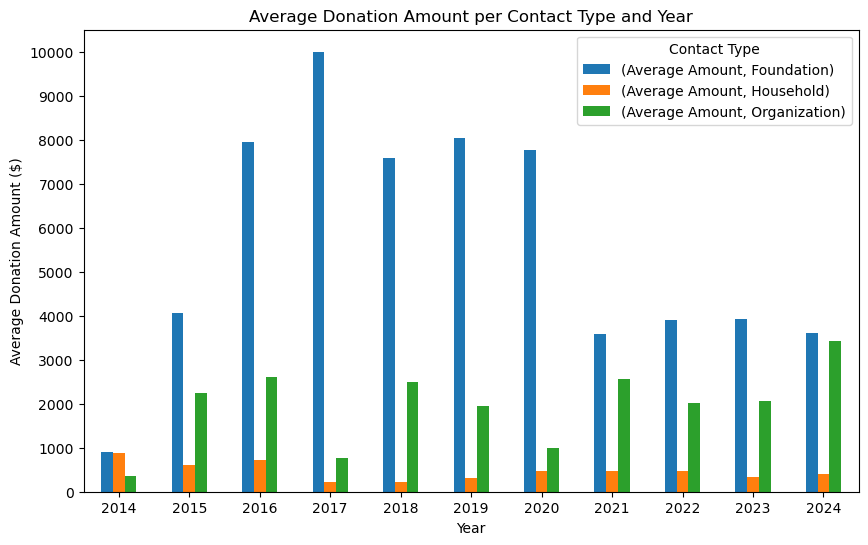

In [27]:
# Unstack the multi-index DataFrame to make plotting easier
unstacked_df = Avg_by_contact_type_per_year.unstack(level=0)

# Plot
unstacked_df.plot(kind='bar', figsize=(10, 6))

# Title and labels
plt.title('Average Donation Amount per Contact Type and Year')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Average Donation Amount ($)')
plt.yticks(range(0, 10001, 1000))


# Legend
plt.legend(title='Contact Type')

# Show plot
plt.show()

- The average donation amount for Foundation contacts has generally increased over the years, peaking in 2017 at 10,000 USD. After reaching its peak, the average donation amount for Foundation contacts gradually declined, stabilizing around 3,000 USD - 4,000 USD in the following years.

- Household contacts show more variability in average donation amounts compared to Foundation contacts. There is a noticeable decrease in average donation amounts for Household contacts from 2015 to 2017, followed by a slight increase in the following years.

- Organization contacts show a moderate increase in average donation amounts from 2014 to 2016, followed by a slight decline in 2017. Similar to Foundation contacts, there is a stabilization in average donation amounts for Organization contacts in the following years.

- Across all contact types, there is a noticeable dip in average donation amounts around the year 2017, followed by a recovery or stabilization. The fluctuations in average donation amounts over the years may indicate shifts in donor behavior, changes in fundraising strategies, or external factors impacting donation patterns.

In [28]:
# Sum of donation amount by contact type per year
Sum_by_contact_type_per_year = \
DonationData.groupby(['Contact Type',DonationData['Gift Date'].dt.year]).agg({'Amount': 'sum'})
# Update feature names to reflect that values are averages
Sum_by_contact_type_per_year.columns = ['Total Amount Donated']

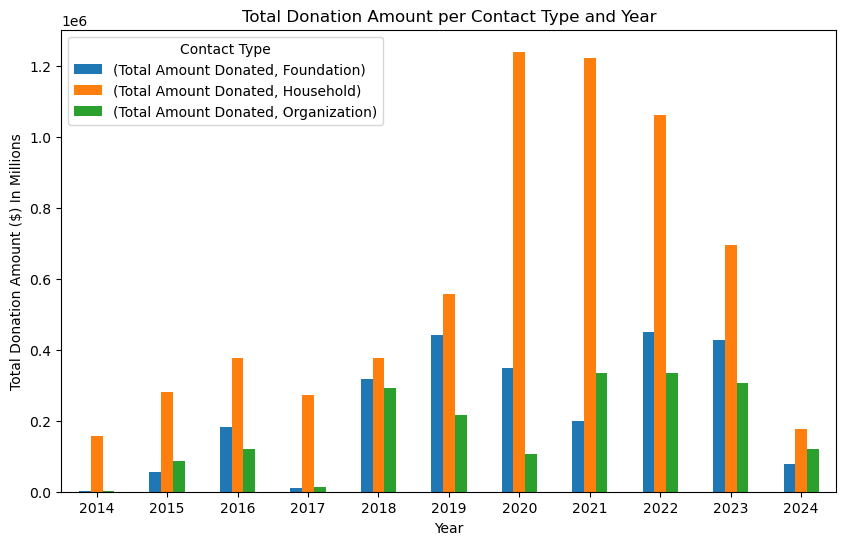

In [29]:
# Unstack the multi-index DataFrame to make plotting easier
unstacked_df2 = Sum_by_contact_type_per_year.unstack(level=0)

# Plot
unstacked_df2.plot(kind='bar', figsize=(10, 6))

# Title and labels
plt.title('Total Donation Amount per Contact Type and Year')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Donation Amount ($) In Millions')

# Legend
plt.legend(title='Contact Type')

# Show plot
plt.show()

- Foundation contacts had a consistent upward trend in donations from 2014 to 2016, reaching a peak in 2016 at 182,699.24 USD. However, donations fluctuated in the following years, hitting a low point in 2017 at 10,000 USD before gradually increasing again. 

- Household contacts showed steady growth in donations over the years, with a surge in 2020 and 2021. The highest total donations for Household contacts were recorded in 2021, amounting to 1,222,522.84 USD.

- Organization contacts began with modest donations in 2014 but saw significant increases in 2015 and 2016. Subsequent years saw fluctuations in donations, peaking in 2018 at 292,304.59 USD.

Overall, it seems that each contact type (Foundation, Household, and Organization) has unique donation trends and patterns. This suggests that each contact type will need to be explored separately to determine tailored fundraising strategies.

#### 2.5.1.2 Relationship Between Contact Social Score and Donor Tenure<a id="2.5.1.2_Relationship_Between_Contact_Social_Score_and_Donor_Tenure"></a>

The hypothesis to be explored here can be summed up in this question: "Do donors with a higher social score tend to donate for a longer period of time?" 

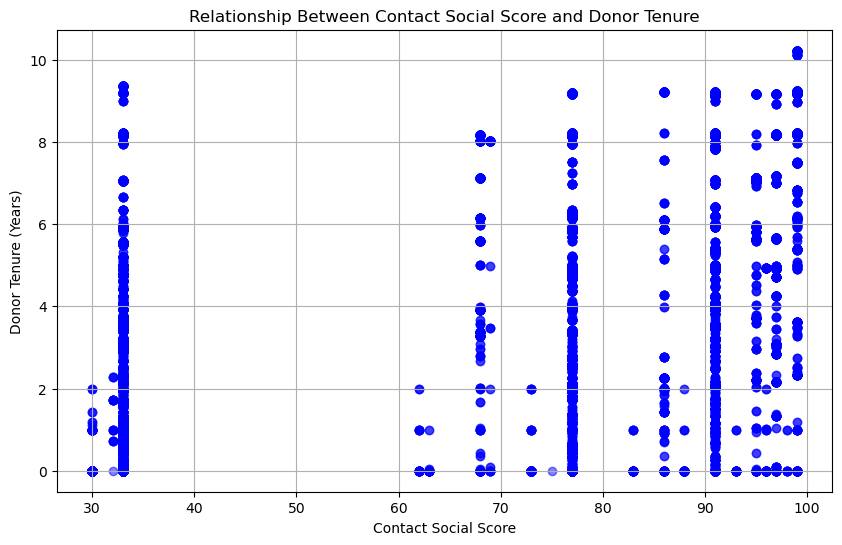

In [30]:
# Scatterplot to show relationship between Contact Social Score and Donor Tenure
plt.figure(figsize=(10, 6))
plt.scatter(DonationData['Contact Social Score'], DonationData['Donor Tenure Years'], 
            color='blue', alpha=0.5)
plt.title('Relationship Between Contact Social Score and Donor Tenure')
plt.xlabel('Contact Social Score')
plt.ylabel('Donor Tenure (Years)')
plt.grid(True)
plt.show()

Considering the observed pattern of the data, it seems that a scatterplot may not capture the relationship between the variables. To better understand this relationship, a boxplot will be employed. This approach will display how donor tenure varies across different levels of Contact Social Score, revealing any patterns or trends within each group.

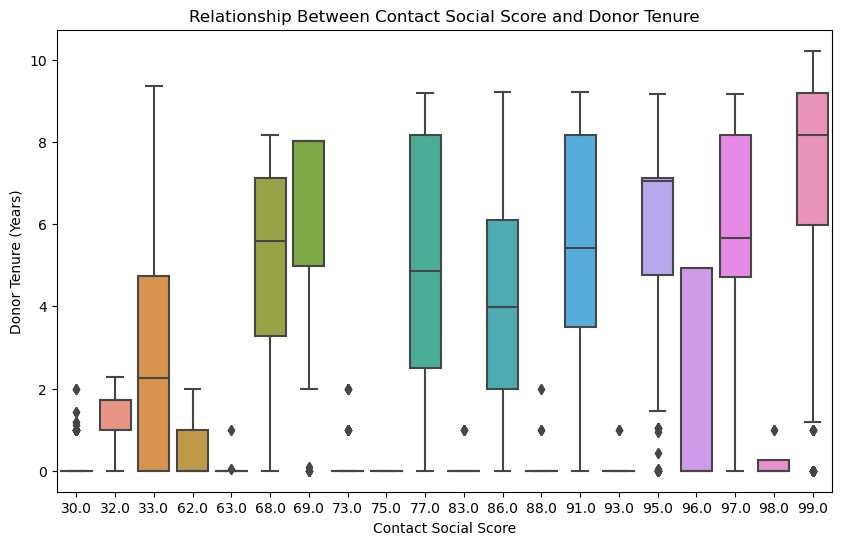

In [31]:
# Boxplot to review Contact Social Score & Donor Tenure

plt.figure(figsize=(10, 6))
sns.boxplot(x='Contact Social Score', y='Donor Tenure Years', data=DonationData)
plt.title('Relationship Between Contact Social Score and Donor Tenure')
plt.xlabel('Contact Social Score')
plt.ylabel('Donor Tenure (Years)')
plt.show()

In this boxplot analysis, the distribution of donor tenure is examined across levels of Contact Social Score. Each box represents the interquartile range, with the median line showing the central tendency. Fluctuations in donor tenure are observed, with a distinct rise in median tenure noted after a Contact Social Score of 77. Outliers beyond the whiskers signal instances of extended donor engagement. These findings hint at a possible association between higher social scores and prolonged donor commitment, prompting further investigation.

The correlation coefficient will be calculated to assess whether there is evidence supporting the suggested relationship between the social score and tenure.

In [32]:
# Correlation coefficient between Contact Social Score & Donor Tenure

correlation = DonationData['Contact Social Score'].corr(DonationData['Donor Tenure Years'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.41694963134335805


A correlation coefficient of 0.4169 indicates a moderate positive correlation between the variables, though the relationship may not be very strong.

#### 2.5.1.3 Effect of Churned Status on Lifetime Value (LTV)<a id="2.5.1.3_Effect_of_Churned_Status_on_Lifetime_Value"></a>

The objective of this section is to investigate the correlation between donor tenure and contribution levels. Reminder: A donor will be classified as churned if they have not made a donation within the last 12 months of March 2024.

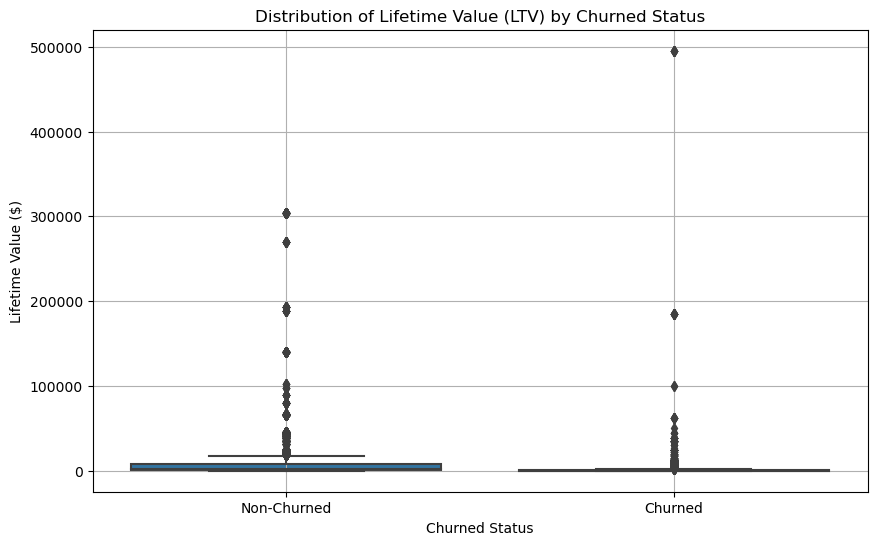

In [33]:
# Plot the distribution of Lifetime Value (LTV) for churned and non-churned donors

# Create a new figure with the specified size
plt.figure(figsize=(10, 6))
# Create a boxplot of Lifetime Value (LTV) by churned status
sns.boxplot(x='Churned', y='LTV', data=DonationData)

plt.title('Distribution of Lifetime Value (LTV) by Churned Status')
plt.xlabel('Churned Status')
plt.ylabel('Lifetime Value ($)')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.grid(True)
plt.show()


There are outliers impacting this visualization. A boxplot without outliers will be generated below. 

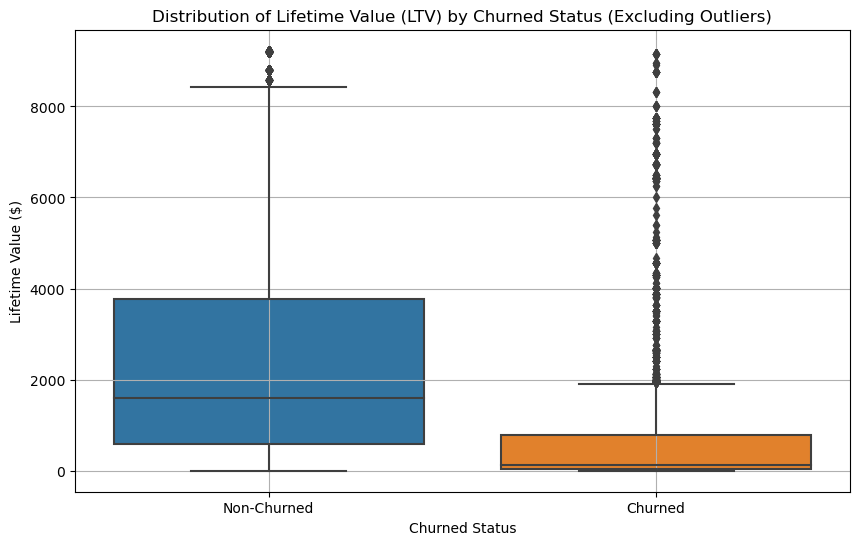

In [34]:
# Identify outliers in the Lifetime Value (LTV) column

# Calculate the first quartile (Q1)
Q1 = DonationData['LTV'].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = DonationData['LTV'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
# Set the outlier threshold
outlier_threshold = 1.5 * IQR

# Find outliers based on the outlier threshold
outliers = DonationData[(DonationData['LTV'] < (Q1 - outlier_threshold)) | \
                        (DonationData['LTV'] > (Q3 + outlier_threshold))]

# Remove outliers from the dataset
DonationData_no_outliers = DonationData[~DonationData['LTV'].isin(outliers['LTV'])]

# Plot the distribution of Lifetime Value (LTV) for churned and non-churned donors without outliers

# Create a new figure with the specified size
plt.figure(figsize=(10, 6))
# Create a boxplot of Lifetime Value (LTV) by churned status
sns.boxplot(x='Churned', y='LTV', data=DonationData_no_outliers)
plt.title('Distribution of Lifetime Value (LTV) by Churned Status (Excluding Outliers)')
plt.xlabel('Churned Status')
plt.ylabel('Lifetime Value ($)')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.grid(True)
plt.show()



Non-churned donors, those who have remained active in their support of the organization, display a higher median donation amount compared to churned donors. This suggests that, on average, non-churned donors contribute more consistently or at higher levels than churned donors. Additionally, when we examine the distribution of donation amounts within each group, we observe that non-churned donors also have a wider range of values that are concentrated around their median. This indicates a greater diversity in donation amounts among non-churned donors, with some individuals contributing substantially more than others. 

In contrast, churned donors have a narrower range of values concentrated around their lower median, suggesting less varied donation behavior with typically smaller contributions. Despite the lower concentration, numerous outliers are still displayed in upper region of the boxplot. Several outliers appear in the upper range, indicating significant one-time contributions despite inactive engagement. These outliers potentially contribute to the lower median observed among churned donors.

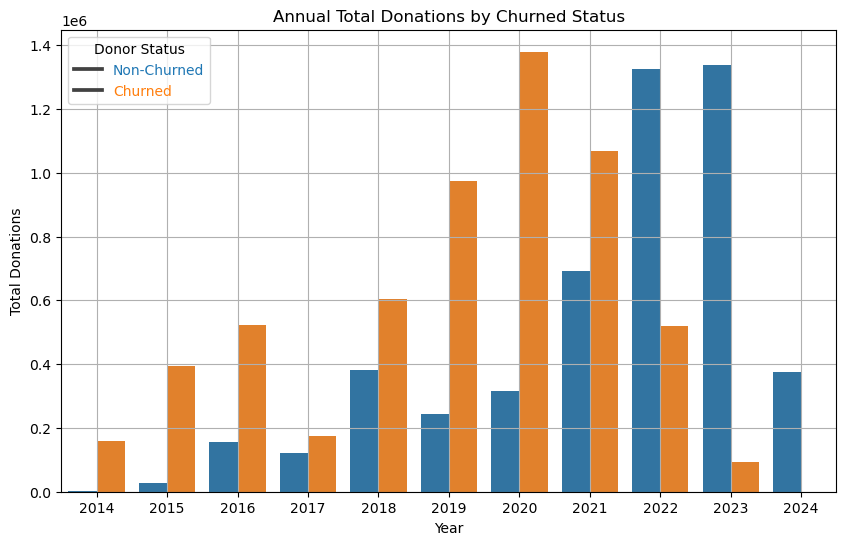

In [35]:
# Calculate annual total donations for churned and non-churned donors
annual_total_donations = DonationData.groupby(['Churned', DonationData['Gift Date'].dt.year])['Amount'].sum().reset_index()

# Selecting a color palette to clearly indicate churned vs non-churned donors
palette = sns.color_palette()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gift Date', y='Amount', hue='Churned', data=annual_total_donations, palette=palette)

plt.title('Annual Total Donations by Churned Status')
plt.xlabel('Year')
plt.ylabel('Total Donations')
plt.legend(title='Donor Status', loc='upper left', labels=['Non-Churned', 'Churned'], labelcolor=palette)
plt.grid(True)
plt.show()

The visualization reveals a consistent trend where churned donors outpaced non-churned donors from 2014 to 2021. However, a significant shift occurred in 2022, with non-churned donors surpassing churned donors. With the dataset's timeframe extending to March 2024, it's crucial to consider the potential reclassification of churned donors as non-churned if they contributed in 2023. This emphasizes the significance of 2022, while further exploration is needed for 2023.

#### 2.5.1.4 Temporal Trends in Donations<a id="2.5.1.4_Temporal_Trends_in_Donations"></a>

In this analysis, donation amounts by year will be examined to identify any noticeable trends in donor contributions.

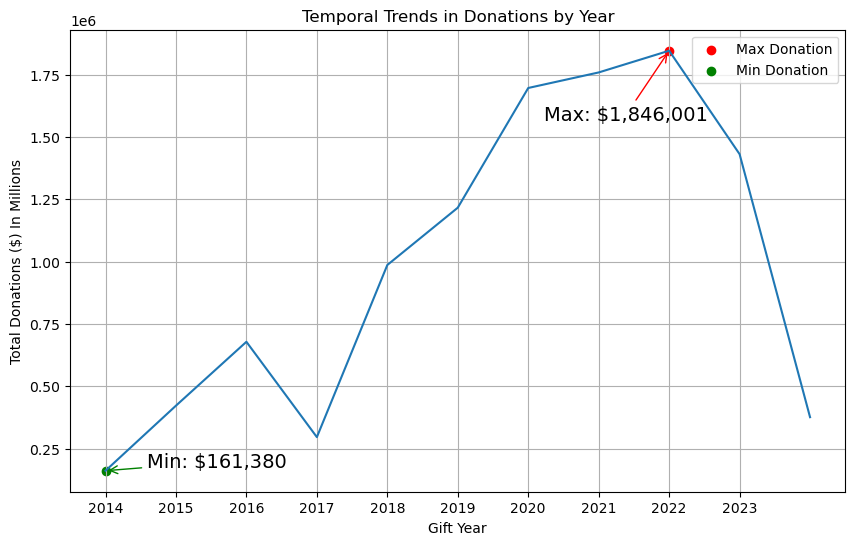

In [36]:
# Aggregate donations by year
DonationData['Gift Year'] = DonationData['Gift Date'].dt.year
annual_donations = DonationData.groupby('Gift Year')['Amount'].sum().reset_index()

# Filter out donations beyond 2024
annual_donations = annual_donations[annual_donations['Gift Year'] <= 2024]

# Find the maximum and minimum donation points
max_donation = annual_donations[annual_donations['Amount'] == annual_donations['Amount'].max()]
min_donation = annual_donations[annual_donations['Amount'] == annual_donations['Amount'].min()]

# Plot temporal trends in donations by year using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(annual_donations['Gift Year'], annual_donations['Amount'])

# Mark the maximum and minimum donation points with red and green dots respectively
plt.scatter(max_donation['Gift Year'], max_donation['Amount'], color='red', label='Max Donation')
plt.scatter(min_donation['Gift Year'], min_donation['Amount'], color='green', label='Min Donation')

# Annotate the maximum and minimum donation points with their respective values
plt.annotate(f'Max: ${max_donation["Amount"].values[0]:,.0f}', 
             (max_donation['Gift Year'], max_donation['Amount']), 
             xytext=(-90, -50), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=14)

plt.annotate(f'Min: ${min_donation["Amount"].values[0]:,.0f}', 
             (min_donation['Gift Year'], min_donation['Amount']), 
             xytext=(30, 2.5), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=14)

plt.title('Temporal Trends in Donations by Year')
plt.xlabel('Gift Year')
plt.ylabel('Total Donations ($) In Millions')
plt.xticks(range(2014, 2024, 1))
plt.grid(True)
plt.legend()
plt.show()


An initial observation highlights the peak in 2022, which is followed by a decrease in donor contributions in 2023. Comparing churned and non-churned donors, it seems that the decline could be associated with a reduction in one-time major donors, who are typically high contributors.

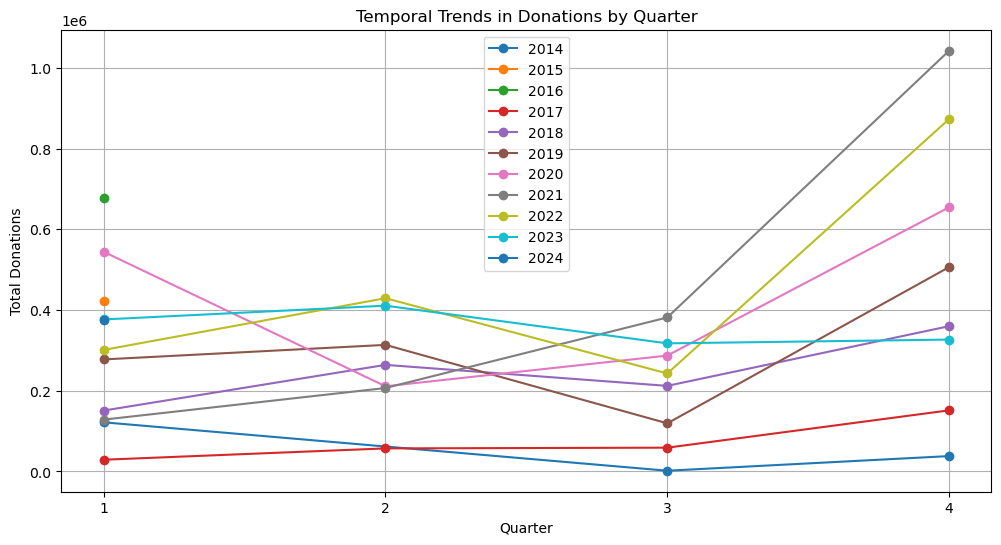

In [37]:
# Extract quarter from 'Gift Date' column
DonationData['Quarter'] = DonationData['Gift Date'].dt.quarter

# Aggregate donations by year and quarter
quarterly_donations = DonationData.groupby(['Gift Year', 'Quarter'])['Amount'].sum().reset_index()

# Plot temporal trends by quarter with smoothed data
plt.figure(figsize=(12, 6))

# Iterate over unique years to plot data for each year
for year in quarterly_donations['Gift Year'].unique():
    year_data = quarterly_donations[quarterly_donations['Gift Year'] == year]
    plt.plot(year_data['Quarter'], year_data['Amount'], marker='o', label=year)

plt.title('Temporal Trends in Donations by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Donations')
plt.xticks(range(1, 5))
plt.grid(True)
plt.legend()
plt.show()


Observing the donation totals across quarters per year reveals a pattern of donors mostly giving in Q4. Here are a few factors for this:
- Households may tend to prioritize charitable giving during the holidays, seeking nonprofits to donate for both altruistic and tax purposes. 
- Towards the end of the year, individuals may realize they have surplus income they can allocate to charitable causes (rather than pay it in the form of taxes). 
- End-of-year giving campaigns by nonprofits, coupled with holiday spirit and a desire to make a difference before the year's end, can also contribute to the surge in donations during Q4

#### 2.5.1.5 Geographic Patterns in Donation Amounts<a id="2.5.1.5_Geographic_Patterns_in_Donation_Amounts"></a>

In this section, the analysis focuses on understanding how donors' geographical locations influence their donation behaviors. By examining donation data across different regions, insights into any regional trends or correlations with giving patterns emerge.

In [38]:
# The address columns
DonationData.loc[:,['Contact Primary Full Address',
                    'Contact Primary Address City',
                    'Contact Primary Address State']]

,Contact Primary Full Address,Contact Primary Address City,Contact Primary Address State
0,Unknown,Unknown,Unknown
1,Unknown,Unknown,Unknown
2,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",Fort Irwin,CA
3,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",Fort Irwin,CA
4,"""4423 Rhineland Dr Unit A\r\nFort Irwin, CA 92...",Fort Irwin,CA
...,...,...,...
17239,"""2035 Escarpa Dr\r\nEagle Rock, CA 90041-3016""",Eagle Rock,CA
17240,"""PO Box 1027\r\nYarmouth, ME 04096-2027""",Yarmouth,ME
17241,"""3242 E Lexington Ave\r\nGilbert 85234""",Gilbert,Unknown
17242,"""3128 Harmony Place\r\nLa Crescenta, CA 91214""",La Crescenta,CA


In [39]:
# Calculate the percentage of missing values for the 'Contact Primary Full Address' column
print('Contact Primary Full Address % Missing:', \
      round((DonationData.loc[:,['Contact Primary Full Address']] == 'Unknown').sum()\
                                    / DonationData.shape[0] * 100, 2).values[0], "%")

# Calculate the percentage of missing values for the 'Contact Primary Address City' column
print('Contact Primary Address City % Missing:', \
      round((DonationData.loc[:,['Contact Primary Address City']] == 'Unknown').sum()\
                                    / DonationData.shape[0] * 100, 2).values[0], "%")

# Calculate the percentage of missing values for the 'Contact Primary Address State' column
print('Contact Primary Address State % Missing:', \
      round((DonationData.loc[:,['Contact Primary Address State']] == 'Unknown').sum()\
                                    / DonationData.shape[0] * 100, 2).values[0], "%")

'''
Explanation of code above:
   - The True values are summed in the boolean mask for each column.
     This count represents the number of missing values in each column.
   - The count of missing values is divided by the total number of rows in the DataFrame 
     to get the proportion of missing values for each column.
   - The result is then multiplied by 100 to convert the proportion to a percentage.
   - The calculated percentage is rounded to 2 decimal places for clarity.
   - Finally, the rounded percentage value is printed along with a descriptive label for each column.
'''

Contact Primary Full Address % Missing: 19.97 %
Contact Primary Address City % Missing: 19.98 %
Contact Primary Address State % Missing: 20.6 %


'\nExplanation of code above:\n   - The True values are summed in the boolean mask for each column.\n     This count represents the number of missing values in each column.\n   - The count of missing values is divided by the total number of rows in the DataFrame \n     to get the proportion of missing values for each column.\n   - The result is then multiplied by 100 to convert the proportion to a percentage.\n   - The calculated percentage is rounded to 2 decimal places for clarity.\n   - Finally, the rounded percentage value is printed along with a descriptive label for each column.\n'

For the most part, if there is a full address, then the city and state columns should be populated. As observed, approximately 20% of addresses are missing. Exploring donor behavior by state and then by city could offer valuable insights. Additionally, incorporating a temporal perspective might further benefit the analysis.

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_46433/1510374544.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in plt.gca().get_xticks()])


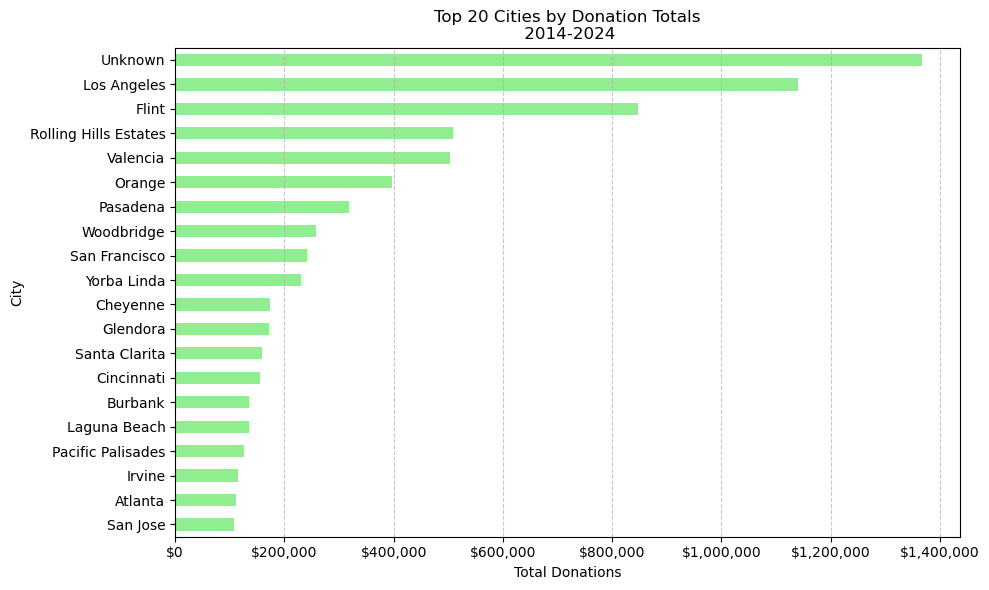

In [40]:
# Set the number of top cities to display
top_n = 20

# Group the data by 'Contact Primary Address City' and sum the 'Amount' for each city
city_donation_totals = DonationData.groupby('Contact Primary Address City')['Amount'].sum()

# Sort the cities based on donation totals in descending order and select the top N cities
top_city_donation_totals = city_donation_totals.sort_values(ascending=False).head(top_n)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_city_donation_totals.sort_values().plot(kind='barh', color='lightgreen')
plt.title(f'Top {top_n} Cities by Donation Totals\n 2014-2024')
plt.xlabel('Total Donations')
plt.ylabel('City')

# Set the format of the x-axis tick labels to display values in hundred thousands
plt.xticks(fontsize=10)
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in plt.gca().get_xticks()])

plt.grid(axis='x', linestyle='--', alpha=0.7) # add vertical grid to easily see the donation total
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_46433/1697297608.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_xticks()])


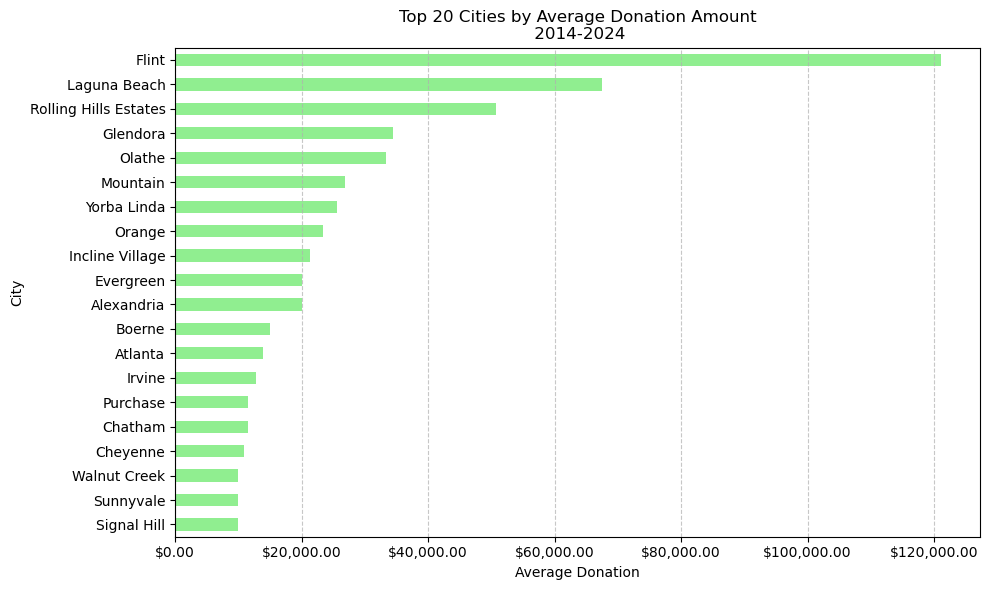

In [41]:
# Set the number of top cities to display
top_n = 20

# Group the data by 'Contact Primary Address City' and calculate the average 'Amount' for each city
city_avg_donations = DonationData.groupby('Contact Primary Address City')['Amount'].mean()

# Sort the cities based on average donation in descending order and select the top N cities
top_city_avg_donations = city_avg_donations.sort_values(ascending=False).head(top_n)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_city_avg_donations.sort_values().plot(kind='barh', color='lightgreen')
plt.title(f'Top {top_n} Cities by Average Donation Amount\n 2014-2024')
plt.xlabel('Average Donation')
plt.ylabel('City')

# Set the format of the x-axis tick labels to display values in dollars
plt.xticks(fontsize=10)
plt.gca().set_xticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_xticks()])

plt.grid(axis='x', linestyle='--', alpha=0.7) # add vertical grid to easily see the average donation
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

<Figure size 1000x600 with 0 Axes>

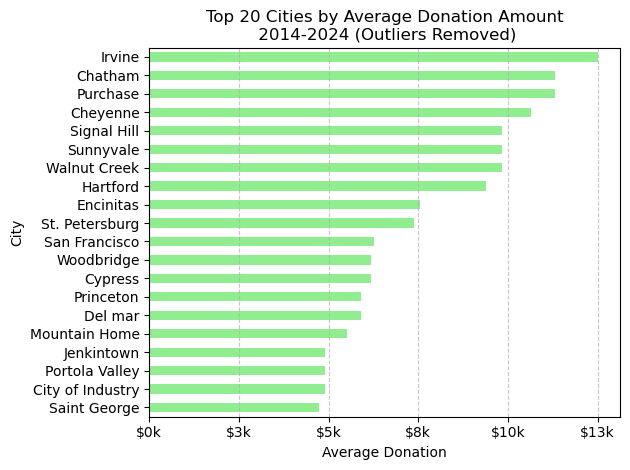

In [42]:
# Set the number of top cities to display
top_n = 20

# Group the data by 'Contact Primary Address City' and calculate the average 'Amount' for each city
city_avg_donations = DonationData.groupby('Contact Primary Address City')['Amount'].mean()

# Define a function to remove outliers based on a threshold
def remove_outliers(data, threshold):
    data_mean = np.mean(data)
    data_std = np.std(data)
    filtered_data = data[(data_mean - threshold * data_std < data) & (data < data_mean + threshold * data_std)]
    return filtered_data

# Remove outliers from average donation data
threshold = 2  # You can adjust this threshold as needed
filtered_avg_donations = pd.DataFrame(remove_outliers(city_avg_donations, threshold), columns=['Amount'])

# Select the top N cities after removing outliers
top_city_avg_donations = filtered_avg_donations.sort_values(by='Amount', ascending=False).head(top_n)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_city_avg_donations.sort_values(by='Amount').plot(kind='barh', color='lightgreen', legend=None)
plt.title(f'Top {top_n} Cities by Average Donation Amount\n 2014-2024 (Outliers Removed)')
plt.xlabel('Average Donation')
plt.ylabel('City')

# Set the format of the x-axis tick labels to display values in dollars
plt.xticks(np.linspace(0, max(top_city_avg_donations['Amount']), 6), ['${:.0f}k'.format(x/1000) for x in np.linspace(0, max(top_city_avg_donations['Amount']), 6)])

plt.grid(axis='x', linestyle='--', alpha=0.7) # add vertical grid to easily see the average donation
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

<Figure size 1000x600 with 0 Axes>

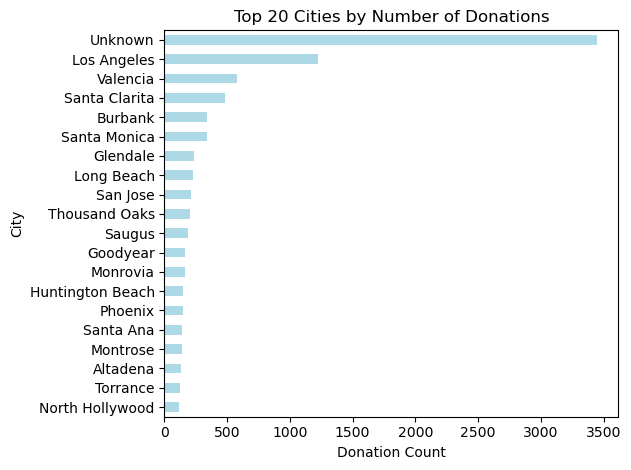

In [43]:
# Set the number of top cities to display
top_n = 20

# Group the data by 'Contact Primary Address City' and calculate the count of donations for each city
city_donations_count = DonationData.groupby('Contact Primary Address City')\
                                   .size().reset_index(name='Donation Count')
# Set the city names as the index
city_donations_count.set_index('Contact Primary Address City', inplace=True)
# Select the top N cities
top_city_donations_count = city_donations_count.sort_values(by='Donation Count', ascending=False).head(top_n)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
top_city_donations_count.sort_values(by='Donation Count').plot(kind='barh', color='lightblue', legend=None)
plt.title(f'Top {top_n} Cities by Number of Donations')
plt.xlabel('Donation Count')
plt.ylabel('City')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

The city with the highest total donation amount is "Unknown," totaling 1,368,100.16 USD. This category likely represents cases where the city information for donors is missing/unspecified or witheld by donor. Following "Unknown," Los Angeles records the second-highest total donation amount, with 1,140,512.87 USD, indicating a good amount of engagement in the city which aligns with the location of the organization (ie Los Angeles). Other cities with notable donation totals include Flint, Rolling Hills Estates, and Valencia.

**Re: Top City Average Donations ($)**

Irvine emerges as the city with the highest average donation amount (with outliers removed), approximately 12,722.22 USD per donation, suggesting a significant capacity for individual giving within the community. Other cities with noteworthy average donation amounts include Chatham, Purchase, and Cheyenne, indicating a tendency for higher-value contributions in these areas. While Irvine has the highest average donation amount, it does not appear among the top cities in terms of total donation amounts, suggesting a potential focus on quality over quantity in charitable giving within the city.

**Re: Top City Donations Count**

The "Unknown" category again tops the list in terms of donation count, with 3445 donations, highlighting the prevalence of unspecified donor locations in the dataset. Los Angeles ranks second in terms of donation count, with 1227 donations, indicating both a high volume and total amount of charitable contributions from this city. Valencia, Santa Clarita, and Burbank also demonstrate considerable levels of community engagement, with notable numbers of donations recorded in each city.

**Overall Summary re: Geographic Patterns**

The data reveals a discrepancy between cities with high total donation amounts and those with high average donation amounts. While some cities like Los Angeles and Valencia demonstrate both high total donation amounts and donation counts, others like Irvine prioritize larger individual donations.

The presence of a significant number of donations categorized under "Unknown" highlights the importance of improving data collection and reporting processes to obtain a more accurate representation of philanthropic activities.

Cities with high total donation amounts may benefit from targeted efforts to sustain and further mobilize community engagement, while cities with high average donation amounts could focus on nurturing a culture of giving and encouraging larger individual contributions.
Understanding the interplay between total donation amounts, average donation amounts, and donation counts provides valuable insights for nonprofits, policymakers, and community organizers to tailor their outreach and fundraising strategies effectively.

### 2.6 Feature Importance<a id=2.6_Feature_Importance></a>

The heatmap provides a visual representation of the correlation coefficients between each pair of numerical features in your dataset.

                      Contact Id    Amount  Contact Social Score   Churned  \
Contact Id              1.000000 -0.001262             -0.334335  0.015381   
Amount                 -0.001262  1.000000             -0.008698  0.026967   
Contact Social Score   -0.334335 -0.008698              1.000000 -0.239286   
Churned                 0.015381  0.026967             -0.239286  1.000000   
LTV                    -0.187408  0.298186              0.089089 -0.161089   
Donor Tenure Years     -0.593052 -0.008864              0.416950 -0.628842   
Gift Year               0.482486  0.001457             -0.015267 -0.449140   
Quarter                 0.116845  0.011284              0.001215 -0.066128   

                           LTV  Donor Tenure Years  Gift Year   Quarter  
Contact Id           -0.187408           -0.593052   0.482486  0.116845  
Amount                0.298186           -0.008864   0.001457  0.011284  
Contact Social Score  0.089089            0.416950  -0.015267  0.001215  
C

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_46433/3220690422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = DonationData.corr()


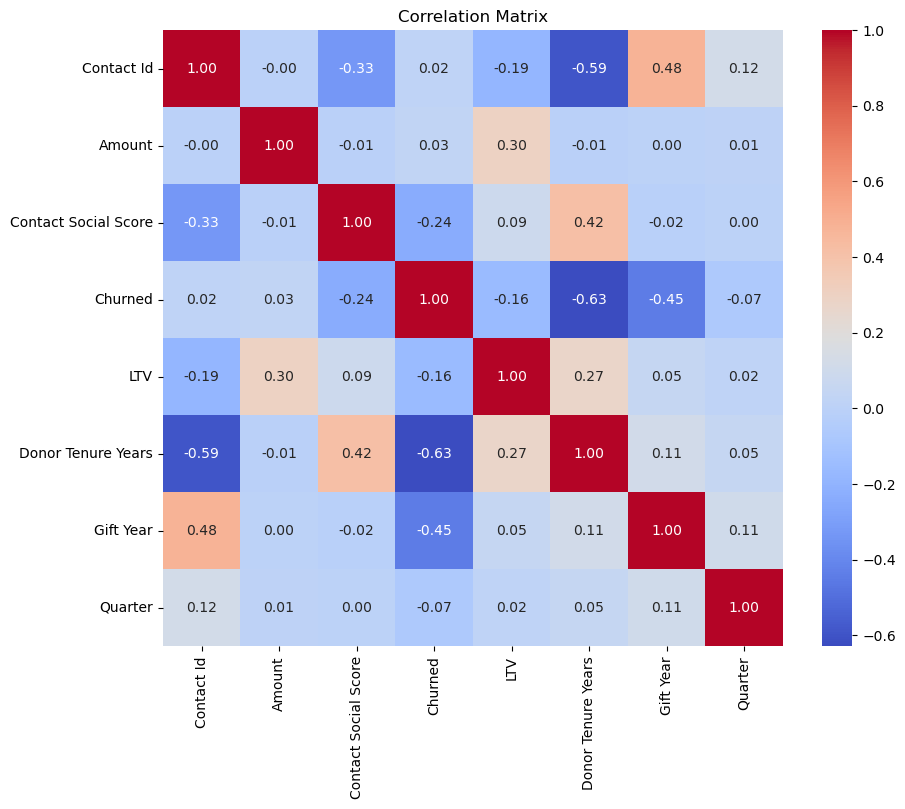

In [105]:
# Calculate the correlation matrix
correlation_matrix = DonationData.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- There is a moderate negative correlation (-0.334) between the contact social score and donor tenure years. This suggests that as the social score increases, the tenure of donors tends to decrease. Although it's known that longer-tenured donors are less likely to churn, the moderate negative correlation suggests an interesting dynamic. It could indicate that donors who engage more actively on social platforms tend to have shorter tenure with the organization. This could be due to a variety of factors, such as younger demographics being more active on social media or donors being more transient in their support.

- There is a strong negative correlation (-0.629) between donor tenure years and churned. This indicates that longer-tenured donors are less likely to churn, which aligns with the intuitive expectation that loyal donors are more likely to continue their support.

- There is a moderate negative correlation (-0.239) between contact social score and churned. This implies that donors with higher social scores are less likely to churn, suggesting that social engagement may contribute to donor retention.

- There is a moderate positive correlation (0.298) between the amount of donation and the lifetime value (LTV) of donors. This suggests that donors who contribute higher amounts tend to have a higher lifetime value to the organization, indicating their long-term value as supporters.

- There is a moderate negative correlation (-0.449) between the year of the gift and churned. This implies that donors who gave gifts in earlier years are less likely to churn, while those who gave gifts more recently are more likely to churn. While it's expected that donors who gave gifts in earlier years are less likely to churn, the moderate negative correlation hints at a potential trend. This could suggest that recent donors are more likely to churn, possibly due to changes in donor demographics, shifts in fundraising strategies, or external factors influencing donor behavior.

- Despite the small positive correlation (0.027) between the amount of donation and churned, it's worth exploring why donors who give larger amounts might be slightly more prone to churn. This could be due to factors such as donor fatigue, changing financial circumstances, or dissatisfaction with the organization's stewardship practices among high-value donors.

In [86]:
# Adding a donation count and average donation amount column

donation_count = DonationData.groupby('Contact Id').size()
donation_count_df = donation_count.reset_index(name='Donation Count')
average_donation_amount = DonationData.groupby('Contact Id').agg({'Amount':'mean'})
average_donation_amount_df = average_donation_amount.reset_index()
average_donation_amount_df.rename(columns={'Amount':'Average Amount'}, inplace=True)

# Making a deep copy to keep DonationData intact
df = DonationData.copy(deep=True)
DonationData_V02 = pd.merge(df, donation_count_df, on='Contact Id', how='left')
DonationData_V02 = pd.merge(DonationData_V02, average_donation_amount_df, on='Contact Id', how='left')

In [112]:
# adding a column for gift month 

DonationData_V02['Gift Month'] = DonationData_V02['Gift Date'].dt.month

# Reorder columns to be more intuitive - closer to CRM formatting
column_order = [
    'Contact Id', 'Contact Type', 'Contact Tags', 'Contact Primary Full Address',
    'Contact Primary Address City', 'Contact Primary Address State','Contact Social Score',
    'Donor Tenure Years',
    'Churned', 'Gift Date', 'Amount', 'Gift Type', 'Notes', 'Segment Name', 'Campaign Name', 
    'Gift Year', 'Quarter','Gift Month', 'Donation Count', 'Average Amount','LTV',
    'First Gift Date', 'Gift Date_last'
]

# Reorder DataFrame columns
DonationData_V02 = DonationData_V02[column_order]

/var/folders/l1/kpr_34xn51ndl39jn5r_rqn00000gn/T/ipykernel_46433/4251026601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_V02 = DonationData_V02.drop(columns='Contact Id').corr()


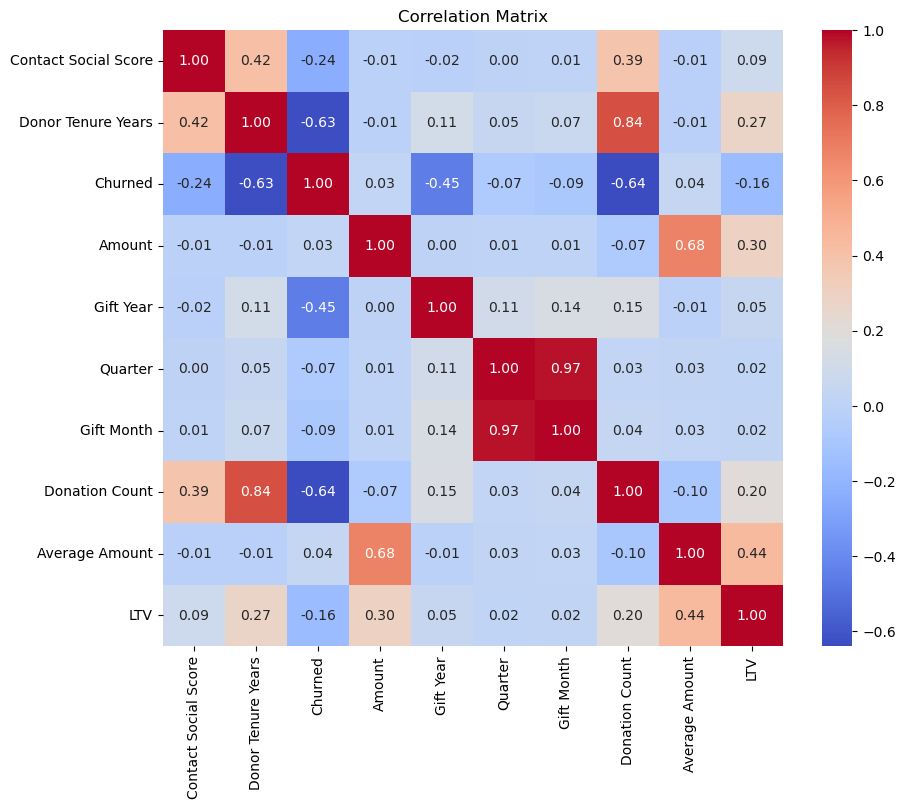

In [113]:
# Calculate the correlation matrix
correlation_matrix_V02 = DonationData_V02.drop(columns='Contact Id').corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_V02, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 2.7 Summary <a id='2.7_Summary'></a>


The exploratory data analysis provided insights into the donor landscape captured within the dataset.

Across various contact types, "Household" was at the top, with a wide array of contact tags and donation dates, with notable occurrences on "2016-01-01." Credit-based donations were the most frequent. While address data was diverse, California (CA) emerged as the most frequent state listed.

Analysis of donation timelines revealed a consistent pattern of contributions, with mid-2020 marking a notable cluster of donations. The dataset spanned from January 2014 to March 2024, capturing a wide range of donation behavior over time.

First-time donations exhibited variability annually, peaking at 798 occurrences in 2020, while contributions from donors with a history of giving showed consistent counts, suggesting evolving dynamics in donor engagement and retention strategies.

Geographically, cities like "Los Angeles," "Flint," and unknown cities demonstrated significant total donation amounts, highlighting the need for improved data collection practices to capture location information accurately. Notably, areas with high donation totals may indicate strong community engagement or targeted fundraising efforts, providing valuable insights for optimizing charitable impact.

In summary, this analysis reveals the diverse nature of philanthropic activities captured in the dataset, emphasizing the importance of understanding donor behavior, engagement strategies, and geographical trends to maximize the effectiveness of fundraising efforts and drive positive social impact.